## Logistic Regression. 
* Logistic regression is a machine learning algorithm for classification. 

**Logistic regression** is based on **Maximum Likelihood (ML) Estimation** which says coefficients should be chosen in such a way that it maximizes the probability of Y given X (likelihood). With ML, the computer uses different “iterations” in which it tries different solutions until it gets the maximum likelihood estimates.

**Types of Logistic Regression**
* Binary Logistic Regression: The categorical response has only two 2 possible outcomes.
* **Multinomial Logistic Regression**: Three or more categories without ordering. (Type of Our Dataset)
* Ordinal Logistic Regression: Three or more categories with ordering.

In [1]:
# Import important libraries
import numpy as np #linear algebra
import pandas as pd # a data processing and CSV I/O library

import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [2]:
#Import data file
df = pd.read_csv('C:\\ABC\\NewData.csv')
df.head(10)

,ID,Sensor1,Sensor2,Sensor3,Sensor4,Compound
0,1,7724200,19702100,24094500,239833,Acetone
1,2,7732180,20105200,23921400,239807,Acetone
2,3,7715400,19960900,23898700,239504,Acetone
3,4,7765770,19935600,23244900,239611,Acetone
4,5,7713900,19939200,23230600,239121,Acetone
5,6,7668770,20131300,23661500,238942,Acetone
6,7,7680430,19891200,24438300,239002,Acetone
7,8,7685920,19946200,23650000,238661,Acetone
8,9,7659660,20084000,23766200,238489,Acetone
9,10,7639480,19950700,23848100,238535,Acetone


In [3]:
#Data Overview
df['Compound'].value_counts()

Acetone       1020
Ethanol        781
Xylene         757
Benzene        737
2-propanol     723
Methanol       659
Toluene        651
Name: Compound, dtype: int64

In [4]:
# Removing Unnecessary Column
df.drop("ID", axis=1, inplace = True)

In [5]:
df.shape

(5328, 5)

### Splitting The Data into Training And Testing Dataset for Logistic Regression.
The data we use is split into **training data** and **test data**. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.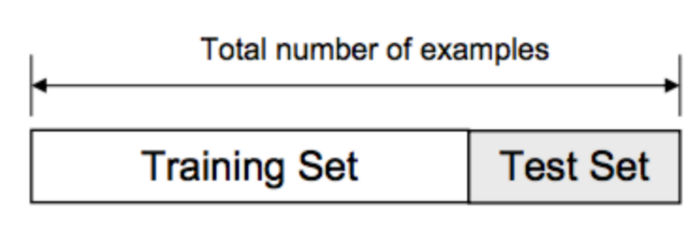

In [6]:
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn import metrics # for checking the model accuracy
train, test = train_test_split(df, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(3729, 5)
(1599, 5)


In [15]:
X_train = train[['Sensor1','Sensor2','Sensor3','Sensor4']] # taking the training data features
y_train = train.Compound # output of the training data

X_test = test[['Sensor1','Sensor2','Sensor3','Sensor4']] # taking test data feature
y_test = test.Compound # output value of the test data

In [16]:
# View of Our Training Dataset. 
X_train.head()

,Sensor1,Sensor2,Sensor3,Sensor4
641,4046260,13673375,17435440,204578
4794,4407980,20950300,5384340,356343
3343,7574400,22995000,22995000,345325
475,4395690,13891663,17141955,213600
4209,4623360,10900200,4900480,326655


In [17]:
# View of Our Testing Dataset.
X_test.head()

,Sensor1,Sensor2,Sensor3,Sensor4
1143,4820380,17964500,21860600,383717
1315,4336980,11724200,20891200,373337
1346,4270840,10935800,20063300,372925
2066,4238510,10929400,7440190,323904
212,4659230,13555000,18497400,222400


In [18]:
y_train.head()

641      Acetone
4794      Xylene
3343    Methanol
475      Acetone
4209     Toluene
Name: Compound, dtype: object

## Fitting Classifier.

In [27]:
# Fitting Classifier to the Training Set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
classifier = LogisticRegression(solver='liblinear', random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [28]:
# Model performance on training set
y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train))

Accuracy: 0.95
Confusion Matrix: 
 [[511   0   0   0   1   0   0]
 [  0 732   0   7   2   0   0]
 [  0   0 487   0   0   0  16]
 [  0   8   0 544   0   0   0]
 [  0 100   0   0 346   0   0]
 [  0   0   0   0   0 458  18]
 [  0   0  21   0   0   9 469]]
              precision    recall  f1-score   support

  2-propanol       1.00      1.00      1.00       512
     Acetone       0.87      0.99      0.93       741
     Benzene       0.96      0.97      0.96       503
     Ethanol       0.99      0.99      0.99       552
    Methanol       0.99      0.78      0.87       446
     Toluene       0.98      0.96      0.97       476
      Xylene       0.93      0.94      0.94       499

    accuracy                           0.95      3729
   macro avg       0.96      0.95      0.95      3729
weighted avg       0.95      0.95      0.95      3729



In [29]:
# Predicting the test results
y_pred=classifier.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred))

Accuracy: 0.95
Confusion Matrix: 
 [[211   0   0   0   0   0   0]
 [  0 275   0   4   0   0   0]
 [  0   0 228   0   0   0   6]
 [  0   3   0 226   0   0   0]
 [  0  42   0   0 171   0   0]
 [  0   0   2   0   0 169   4]
 [  0   0  12   0   0   5 241]]
              precision    recall  f1-score   support

  2-propanol       1.00      1.00      1.00       211
     Acetone       0.86      0.99      0.92       279
     Benzene       0.94      0.97      0.96       234
     Ethanol       0.98      0.99      0.98       229
    Methanol       1.00      0.80      0.89       213
     Toluene       0.97      0.97      0.97       175
      Xylene       0.96      0.93      0.95       258

    accuracy                           0.95      1599
   macro avg       0.96      0.95      0.95      1599
weighted avg       0.95      0.95      0.95      1599



### Applying Logistic Regression Algorithm. 

In [30]:
# importing the necessary packages to use the Logistic Regression classification algorithms.
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9706066291432145


In [31]:
#Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test, prediction)
cm

array([[206,   4,   0,   1,   0,   0,   0],
       [  0, 279,   0,   0,   0,   0,   0],
       [  0,   0, 234,   0,   0,   0,   0],
       [  0,  10,   0, 219,   0,   0,   0],
       [  0,   3,   0,   0, 210,   0,   0],
       [  0,   0,   0,   0,   0, 168,   7],
       [  0,   0,   0,   0,   0,  22, 236]], dtype=int64)

*** Test Accuracy *** 0.9706066291432145


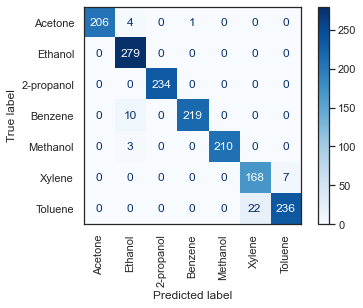

In [35]:
print('*** Test Accuracy ***',model.score(X_test,y_test))
disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['Acetone','Ethanol','2-propanol','Benzene','Methanol','Xylene','Toluene'],
                                 xticks_rotation=90,cmap=plt.cm.Blues,
                             values_format='g'
                            )

## Observation.
We have applied Logistic Regression on our present data as we know that logistic Regression is use for classification, we are getting an accuracy of 96.31 % for our dataset. 
The following Confusion Matrix is also justifying our accuracy. 